In [27]:
import pandas as pd
import numpy as np
from sklearn    import cluster   as ct 
from sklearn    import metrics   as mt
from matplotlib import pyplot    as plt
from sklearn.preprocessing import StandardScaler
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [47]:
dataset_path = r"C:\Users\muzio\OneDrive\Documentos\repos\machine_learning\Clustering\X_dataset.csv"

X = pd.read_csv (dataset_path)

X

,alcohol,malic_acid,ash,ash_alcanity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1.518613,0.191700,0.232053,-1.169593,1.913905,0.627586,0.573840,-0.659563,1.224884,0.251717,0.455285,0.970696,0.561341
1,0.246290,0.205534,-0.827996,-2.490847,0.018145,0.575862,0.510549,-0.820719,-0.544721,-0.293321,0.463415,0.780220,0.550642
2,0.196879,0.320158,1.109334,-0.268738,0.088358,0.627586,0.611814,-0.498407,2.135968,0.269020,0.447154,0.695971,0.646933
3,1.691550,0.239130,0.487926,-0.809251,0.930918,0.989655,0.664557,-0.981875,1.032155,1.186068,0.308943,0.798535,0.857347
4,0.295700,0.365613,1.840403,0.451946,1.281985,0.627586,0.495781,0.226796,0.401404,-0.319276,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,0.970356,0.305159,0.301803,-0.332922,0.241379,0.056962,1.274310,-0.930179,1.142811,0.130081,0.172161,0.329529
174,0.493343,0.626482,0.414820,1.052516,0.158572,0.282759,0.086498,0.549108,-0.316950,0.969783,0.178862,0.106227,0.336662
175,0.332758,0.699605,-0.389355,0.151661,1.422412,0.210345,0.073840,0.549108,-0.422075,2.224236,0.089431,0.106227,0.397290
176,0.209232,0.365613,0.012732,0.151661,1.422412,0.231034,0.071730,1.354888,-0.229346,1.834923,0.097561,0.128205,0.400856


0.213219480988304
0.2331050172234707
0.24237033853030893
0.18746853007839204
0.22447800765113685
0.21728298677207455
0.18297094267171113
0.1860355727345223
0.1948907883437715
0.17020414485132612
0.16601342772107397
0.1746785184616728
0.19732331169790548


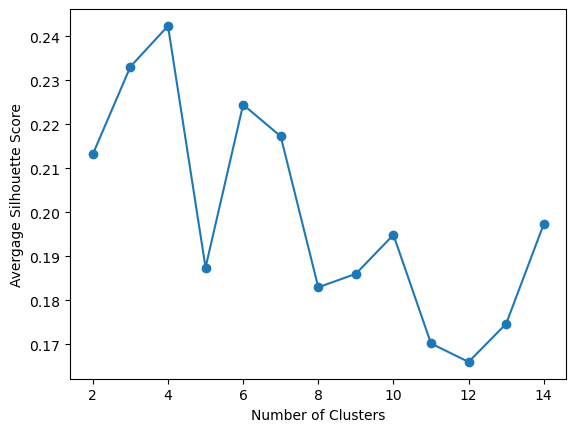

In [46]:



# Training the cluster 
n_clusters = np.arange ( 2, 15)
ss_list = []
for k in n_clusters:
    kmeans = ct.KMeans( n_clusters= k, init='random', algorithm='elkan', random_state=0, n_init=8 )
    # fit 
    labels = kmeans.fit_predict( X ) 

    #Silhouette score
    ss_avg = mt.silhouette_score(X, labels)
    #print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, ss_avg))
    print (ss_avg)
    # add silhouette to list 
    ss_list.append( ss_avg )    

 
plt.plot( n_clusters, ss_list, marker='o' ) 
plt.xlabel( 'Number of Clusters' ); 
plt.ylabel( 'Avergage Silhouette Score' ); 